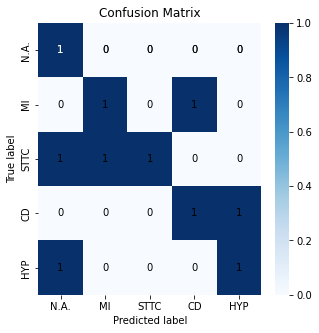

In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)

# true and pred labels (ground-truth and output of our models)
y_true = np.array([[0, 1, 0, 1], [1, 0, 0, 1], [0, 1, 1, 0], [1, 1, 1, 0], [0, 0, 0, 0]])
y_pred = np.array([[0, 0, 0, 0], [1, 0, 0, 1], [0, 1, 0, 1], [1, 0, 1, 0], [0, 0, 0, 0]])


def conversion(y_true, y_pred):
    y_true_out = []
    y_pred_out = []
    for y_true_aux, y_pred_aux in zip(y_true, y_pred):
        if np.sum(y_true_aux) == 0 and np.sum(y_pred_aux) == 0: #true normal, pred normal
            y_pred_out.append(0)
            y_true_out.append(0)
        elif np.sum(y_true_aux) == 0: #true normal, pred not normal
            i=0
            for p in y_pred_aux:
                i+=1
                if p==1:
                    y_pred_out.append(i)
                    y_true_out.append(0)
        elif np.sum(y_pred_aux) == 0: #true not normal, pred normal
            i=0
            for t in y_true_aux:
                i+=1
                if t==1:
                    y_pred_out.append(0)
                    y_true_out.append(i)
        else:
            pred_aux = []
            true_aux = []
            i=0
            for t in y_true_aux:
                i+=1
                if t==1:
                    true_aux.append(i)
            i=0
            for p in y_pred_aux:
                i+=1
                if p==1:
                    pred_aux.append(i)
            
            if len(pred_aux)>len(true_aux):
                true_aux = np.pad(true_aux, len(pred_aux)-len(true_aux), 'reflect')
            elif len(true_aux)>len(pred_aux):
                pred_aux = np.pad(pred_aux, len(true_aux)-len(pred_aux), 'reflect')
            
            for p, t in zip(pred_aux, true_aux):
                y_pred_out.append(p)
                y_true_out.append(t)
    
    return np.asarray(y_true_out), np.asarray(y_pred_out)

y_true_final, y_pred_final = conversion(y_true, y_pred)

#class labels
class_labels = ['N.A.', 'MI', 'STTC', 'CD', 'HYP']

confusion_matrix = confusion_matrix(y_true_final, y_pred_final)

# heatmap visualization
ax = sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        if i==0 and j==0:
            text = ax.text(j + 0.5, i + 0.5, confusion_matrix[i, j], ha='center', va='center', color='white')
        else:
            text = ax.text(j + 0.5, i + 0.5, confusion_matrix[i, j], ha='center', va='center', color='black')
            

plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

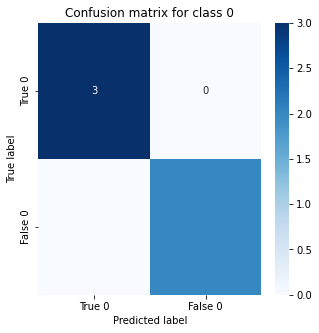

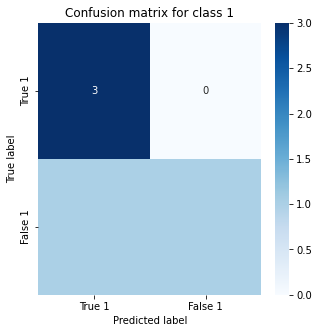

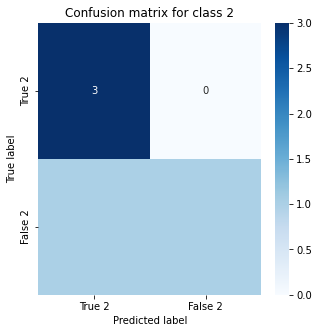

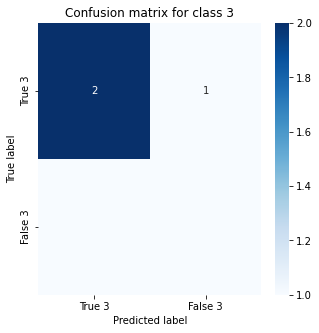

In [3]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# true and pred labels
y_true = np.array([[0, 1, 0, 1], [1, 0, 0, 1], [0, 1, 1, 0], [1, 0, 1, 0], [0, 0, 0, 0]])
y_pred = np.array([[0, 0, 0, 0], [1, 0, 0, 1], [0, 1, 0, 1], [1, 0, 1, 0], [0, 0, 0, 0]])

confusion_matrix = multilabel_confusion_matrix(y_true, y_pred)

# heatmap visualization
for i in range(confusion_matrix.shape[0]):
    labels = [f"True {i}", f"False {i}"]
    sns.heatmap(confusion_matrix[i], annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion matrix for class {i}")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()